In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metrics

In [261]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values)

pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
prcAll = pd.DataFrame(prcAll)
print ("Loaded %d instruments for %d days" % (nInst, nt))

Loaded 100 instruments for 250 days


In [262]:
positions = np.load('./results/positions.npy')

In [263]:
positions

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [-22.,  25.,  14., ...,  47.,  -3.,  -6.],
       [  0.,  26.,  15., ...,   0.,  -4.,  -7.],
       [  1.,  27.,   0., ...,   1.,  -5.,  -8.]])

In [264]:
movingAvg = prcAll.rolling(14).mean()

In [265]:
stockIndex = 1

In [266]:
def getPotentialRealisedProfit(prices, currentStockPrice, lastPosition):
    avgEntryPrice = sum(prices) / len(prices)
    differenceInPrice = avgEntryPrice - currentStockPrice
    # or is it lastPosition * differenceInPrice i dont fucking know
    gain = -lastPosition * differenceInPrice
    if lastPosition < 0:
        return previousRealisedProfit + gain
    else:
        return previousRealisedProfit - gain

In [267]:
profit = []

# positions[:,stockIndex]
prices = []
previousRealisedProfit = 0

for i, val in enumerate(prcAll[stockIndex]):
    if i > 0 and i < 249:
        currentStockPrice = prcAll[stockIndex][i]
        lastStockPrice = prcAll[stockIndex][i-1]
        currentPosition  = positions[:,stockIndex][i-1]
        lastPosition = positions[:,stockIndex][i-2]

        if currentPosition != lastPosition and i > 1:
            prices.append(lastStockPrice)
            profit.append(getPotentialRealisedProfit(prices, currentStockPrice, lastPosition))

            if currentPosition == 0:
                prices = []
                previousRealisedProfit = profit[-1]
        else:
            profit.append(profit[-1])
    elif i == 0:
        profit.append(0)
    else:
        if len(prices):
            avgEntryPrice = sum(prices) / len(prices)
            profit.append(getPotentialRealisedProfit(prices, currentStockPrice, lastPosition))
        else:
            profit.append(profit[-1])

In [268]:
print(len(profit))

250


4.369426739926709
27.0


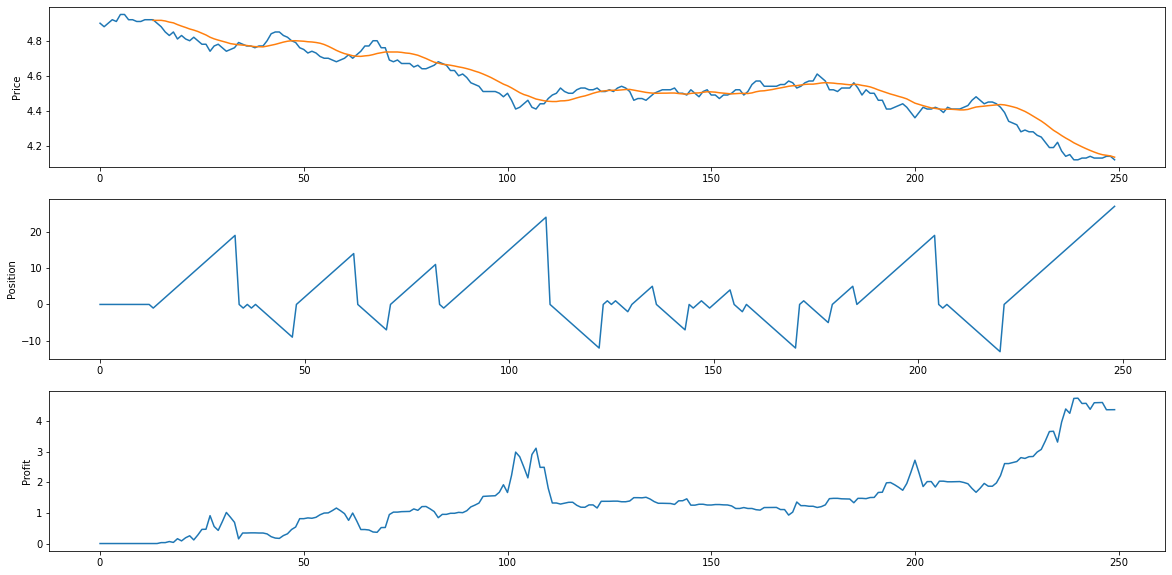

In [269]:
fig, ax = plt.subplots(3, 1, figsize = (20, 10))
ax[0].plot(prcAll[stockIndex])
ax[0].plot(movingAvg[stockIndex])
ax[0].set_ylabel("Price")
ax[1].plot(positions[:,stockIndex])
ax[1].set_ylabel("Position")
ax[2].plot(profit)
ax[2].set_ylabel("Profit")


print(profit[-1])
print(positions[:,stockIndex][-1])